# Iris

In [490]:
%matplotlib inline

In [491]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pylab
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML


from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [492]:
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# 0: Read the data 

In [493]:
iris = pd.read_csv('Iris.csv')
iris=iris.drop('Id', axis=1)

In [494]:
iris.shape

(150, 5)

In [441]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [442]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [443]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# D:  Numerical processing

In [444]:
#findout no of rows for each Species.
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [445]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [446]:
stats=pd.DataFrame()
stats["mean"]=iris.mean()
stats["Var"]=iris.var()
stats

,mean,Var
SepalLengthCm,5.843333,0.685694
SepalWidthCm,3.054000,0.188004
PetalLengthCm,3.758667,3.113179
PetalWidthCm,1.198667,0.582414


In [447]:
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# F:Correlation

In [448]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [449]:
def get_mean_vector(A):
    mean_vector=[]
    for i in range(Feature_number):
        sum=0
        for value in A[:,i]:
            sum=sum+float(value)#accumulate all element in row i
        mean_vector.append(float(sum/len(A[:,i])))#add average value to MEAN_VECTOR
    return mean_vector

In [450]:
setosa_mean=setosa.mean()
versicolor_mean=versicolor.mean()
virginica_mean=virginica.mean()

In [451]:
np.corrcoef(setosa_mean,versicolor_mean)

array([[1.       , 0.7638543],
       [0.7638543, 1.       ]])

In [452]:
np.corrcoef(setosa_mean,virginica_mean)

array([[1.        , 0.61843828],
       [0.61843828, 1.        ]])

In [453]:
np.corrcoef(versicolor_mean,virginica_mean)

array([[1.        , 0.97948861],
       [0.97948861, 1.        ]])

# E:Covariance

In [454]:
iris.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


In [455]:
def get_mean_vector(A):
    mean_vector=[]
    for i in range(Feature_number):
        sum=0
        for value in A[:,i]:
            sum=sum+float(value)#accumulate all element in row i
        mean_vector.append(float(sum/len(A[:,i])))#add average value to MEAN_VECTOR
    return mean_vector

In [456]:
def get_covariance_matrix(A):
    if all_Feature == False:
        number=CUS_NUMBER
    else:
        number=Training_number
    A=numpy.reshape(A,(number,Feature_number))#transform One-dimensional matrix to matrix50*Feature_number matrix
    A=numpy.array(A,dtype='f')#set the values in the array are float
    mean_vector=get_mean_vector(A)#call MEAN_VECTOR()
    cov_matrix = numpy.reshape(numpy.zeros(Feature_number*Feature_number), (Feature_number,Feature_number))#matrix initialize
#original matrix minus MEAN_VECTOR
    for x in range(Feature_number):
        for y in range(len(A[:,x])):
            A[:,x][y]=float(A[:,x][y])-float(mean_vector[x])
#covariance(i,j)
#matrix multiply
    for x in range(Feature_number):
        for y in range(Feature_number):
            dot=0
            for z in range(len(A[:,x])):
                dot=float(A[:,x][z])*float(A[:,y][z])+dot#row_x＊row_Y
            cov_matrix[x][y]=dot/(number-1)#storage back to COV_MATRIX,them divide by N-1
    print(cov_matrix)

In [457]:
import numpy
import csv
import matplotlib.pyplot as plt



all_Feature=False
Iris_setosa=[]
Iris_versicolor=[]
Iris_virginica=[]
Iris=[]


Feature_number=4
Training_number=50
CUS_NUMBER=50

label=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]



def data_processing():
    X=-1
    fn=open("iris.data.txt","r")
    for row in csv.DictReader(fn,label):
        X=X+1
        for i in range(Feature_number):
            Iris.append(row[label[i]])
            if str(row["class"]) == "Iris-setosa":
                if all_Feature== True:
                    Iris_setosa.append(row[label[i]])
                else:
                    if X%(Training_number/CUS_NUMBER)==0 and len(Iris_setosa)<CUS_NUMBER*4:
                        Iris_setosa.append(row[label[i]])
            elif str(row["class"]) == "Iris-versicolor":
                if all_Feature== True:
                    Iris_versicolor.append(row[label[i]])
                else:
                    if X%(Training_number/CUS_NUMBER)==0 and len(Iris_versicolor)<CUS_NUMBER*4:
                        Iris_versicolor.append(row[label[i]])
            else:
                    if all_Feature== True:
                        Iris_virginica.append(row[label[i]])
                    else:
                        if X%(Training_number/CUS_NUMBER)==0 and len(Iris_virginica)<CUS_NUMBER*4:
                            Iris_virginica.append(row[label[i]])
    fn.close()
    
    




In [458]:
def draw():
    for m in range(Feature_number):
        for n in range(Feature_number):
            if m < n:
                fn=open("iris.data.txt","r")
                for row in csv.DictReader(fn, label):
                  
                    plt.xlabel(label[m])#
                    plt.ylabel(label[n])
                    plt.title(label[m]+"  and  "+label[n])
                    x = row[label[m]]#X
                    y = row[label[n]]#Y
                    if row["class"]=="Iris-setosa":
                        plt.plot(x,y,"ro")#setosa
                    elif row["class"]=="Iris-versicolor":
                        plt.plot(x,y,"bo")#versicolor
                    else:
                        plt.plot(x,y,"go")#virginica
                plt.savefig(""+label[m]+"_and_"+label[n]+".png",dpi=300,format="png")
                plt.close()
                fn.close()


In [459]:
    data_processing()
    print("Iris_setosa\n")
    get_covariance_matrix(Iris_setosa)
    print("Iris_versicolor\n")
    get_covariance_matrix(Iris_versicolor)
    print("Iris_virginica\n")
    print(get_covariance_matrix(Iris_virginica))

    if all_Feature == False:
        number=CUS_NUMBER
    else:
        number=Training_number
    print("Data number: "+str(number)+"\n")

    print("Iris_setosa mean vector:\n")
    print(get_mean_vector(numpy.reshape(Iris_setosa,(number,Feature_number))))
    print("\n")
    print("Iris_versicolor mean vector:\n")
    print(get_mean_vector(numpy.reshape(Iris_versicolor,(number,Feature_number))))
    print("\n")
    print("Iris_virginica mean vector:\n")
    print(get_mean_vector(numpy.reshape(Iris_virginica,(number,Feature_number))))
    print("\n")
  

Iris_setosa

[[0.12424897 0.10029795 0.01613878 0.01054694]
 [0.10029795 0.14517959 0.01168164 0.01143674]
 [0.01613878 0.01168164 0.03010613 0.00569796]
 [0.01054694 0.01143674 0.00569796 0.01149388]]
Iris_versicolor

[[0.26643266 0.08518367 0.18289797 0.05577959]
 [0.08518367 0.09846939 0.08265305 0.04120408]
 [0.18289797 0.08265305 0.22081632 0.07310204]
 [0.05577959 0.04120408 0.07310204 0.03910612]]
Iris_virginica

[[0.40434278 0.09376325 0.30328976 0.04909387]
 [0.09376325 0.10400408 0.07137958 0.04762857]
 [0.30328976 0.07137958 0.30458773 0.04882448]
 [0.04909387 0.04762857 0.04882448 0.07543266]]
None
Data number: 50

Iris_setosa mean vector:

[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]


Iris_versicolor mean vector:

[5.936, 2.7700000000000005, 4.26, 1.3259999999999998]


Iris_virginica mean vector:

[6.587999999999998, 2.9739999999999998, 5.552, 2.026]




In [460]:
draw()

# Dataframe

In [461]:
#Create 3 DataFrame for each Species
setosa=iris[iris['Species']=='Iris-setosa']
versicolor =iris[iris['Species']=='Iris-versicolor']
virginica =iris[iris['Species']=='Iris-virginica']

print('setosa')
print(setosa.describe())
print("*********************************************************************************")
print('versicolor')
print(versicolor.describe())
print("*********************************************************************************")
print('virginica')
print(virginica.describe())

setosa
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000
*********************************************************************************
versicolor
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000      1.000000
25% 

# G:Virginica

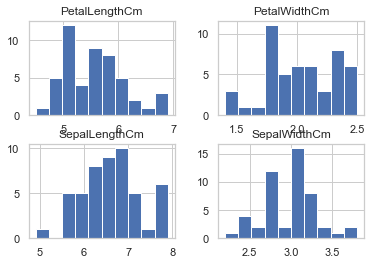

In [462]:
virginica.hist()
plt.show()

In [463]:
virginica.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.457228,0.864225,0.281108
SepalWidthCm,0.457228,1.000000,0.401045,0.537728
PetalLengthCm,0.864225,0.401045,1.000000,0.322108
PetalWidthCm,0.281108,0.537728,0.322108,1.000000


In [464]:
virginica.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.404343,0.093763,0.303290,0.049094
SepalWidthCm,0.093763,0.104004,0.071380,0.047629
PetalLengthCm,0.303290,0.071380,0.304588,0.048824
PetalWidthCm,0.049094,0.047629,0.048824,0.075433


In [465]:
species_list = list(iris['Species'].unique())
print("Types of species: %s\n" % species_list)

print("Dataset length: %i\n" % len(iris))

print("Sepal length range: [%s, %s]" % (min(iris["SepalLengthCm"]), max(iris["SepalLengthCm"])))
print("Sepal width range:  [%s, %s]" % (min(iris["SepalWidthCm"]), max(iris["SepalLengthCm"])))
print("Petal length range: [%s, %s]" % (min(iris["PetalLengthCm"]), max(iris["PetalLengthCm"])))
print("Petal width range:  [%s, %s]\n" % (min(iris["PetalWidthCm"]), max(iris["PetalWidthCm"])))

print("Sepal length variance:\t %f" % np.var(iris["SepalLengthCm"]))
print("Sepal width variance: \t %f" % np.var(iris["SepalWidthCm"]))
print("Petal length variance:\t %f" % np.var(iris["PetalLengthCm"]))
print("Petal width variance: \t %f\n" % np.var(iris["PetalWidthCm"]))

print("Sepal length stddev:\t %f" % np.std(iris["SepalLengthCm"]))
print("Sepal width stddev: \t %f" % np.std(iris["SepalWidthCm"]))
print("Petal length stddev:\t %f" % np.std(iris["PetalLengthCm"]))
print("Petal width stddev: \t %f\n" % np.std(iris["PetalWidthCm"]))

print("Description\n---")
print(iris[iris.columns[2:]].describe())

Types of species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Dataset length: 150

Sepal length range: [4.3, 7.9]
Sepal width range:  [2.0, 7.9]
Petal length range: [1.0, 6.9]
Petal width range:  [0.1, 2.5]

Sepal length variance:	 0.681122
Sepal width variance: 	 0.186751
Petal length variance:	 3.092425
Petal width variance: 	 0.578532

Sepal length stddev:	 0.825301
Sepal width stddev: 	 0.432147
Petal length stddev:	 1.758529
Petal width stddev: 	 0.760613

Description
---
       PetalLengthCm  PetalWidthCm
count     150.000000    150.000000
mean        3.758667      1.198667
std         1.764420      0.763161
min         1.000000      0.100000
25%         1.600000      0.300000
50%         4.350000      1.300000
75%         5.100000      1.800000
max         6.900000      2.500000


# A:2D Histogram

Text(0,0.5,'SepalWidth')

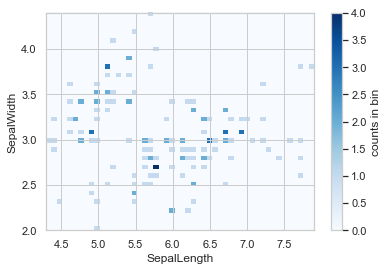

In [466]:
plt.hist2d(iris.SepalLengthCm, iris.SepalWidthCm, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

Text(0,0.5,'PetalWidth')

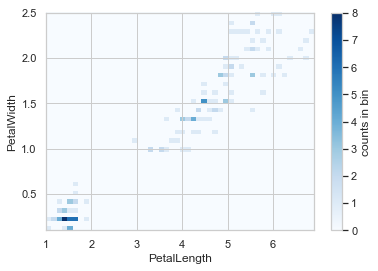

In [467]:
plt.hist2d(iris.PetalLengthCm, iris.PetalWidthCm, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

Text(0,0.5,'PetalWidth')

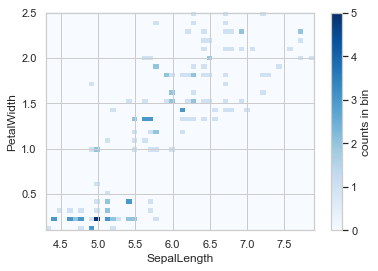

In [468]:
plt.hist2d(iris.SepalLengthCm, iris.PetalWidthCm, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('SepalLength')
plt.ylabel('PetalWidth')

Text(0,0.5,'PetalLengthCm')

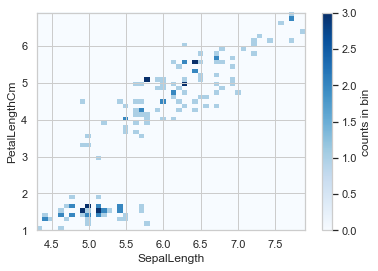

In [469]:
plt.hist2d(iris.SepalLengthCm, iris.PetalLengthCm, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('SepalLength')
plt.ylabel('PetalLengthCm')

Text(0,0.5,'PetalWidthCm,')

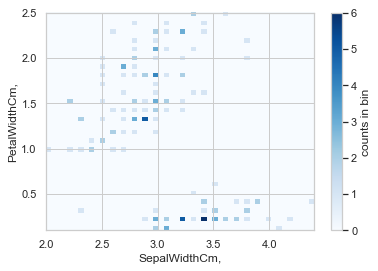

In [470]:
plt.hist2d(iris.SepalWidthCm, iris.PetalWidthCm, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('SepalWidthCm,')
plt.ylabel('PetalWidthCm,')

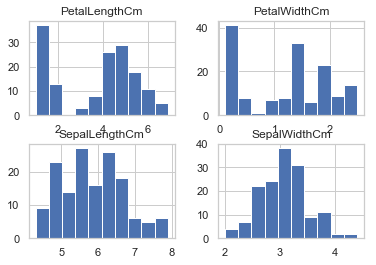

In [471]:
iris.hist()
plt.show()

C:\Users\AVAJANG-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


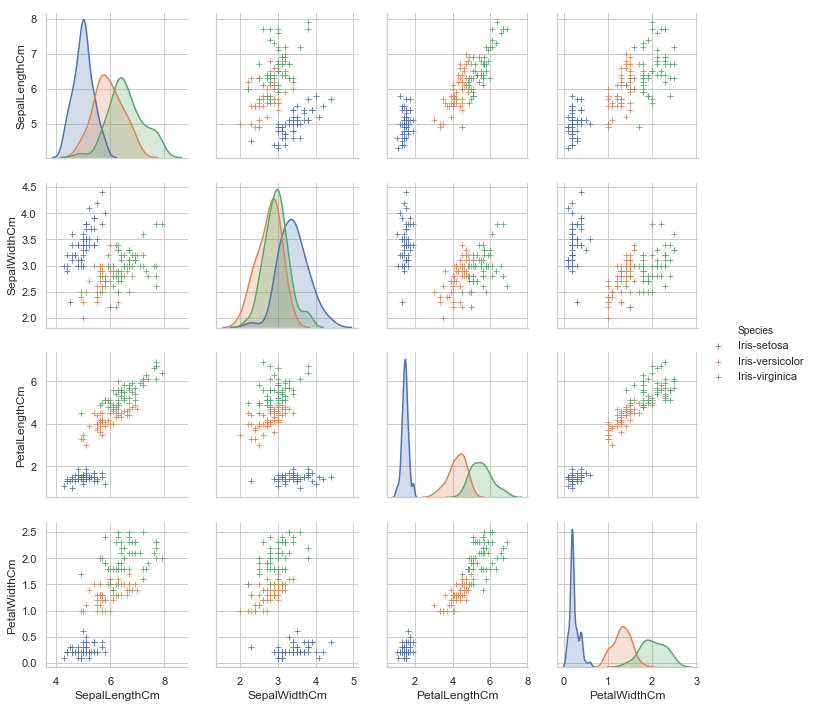

In [472]:
g = sns.pairplot(iris, hue='Species', markers='+')
plt.show()

# B:# 3D Histogram

In [473]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


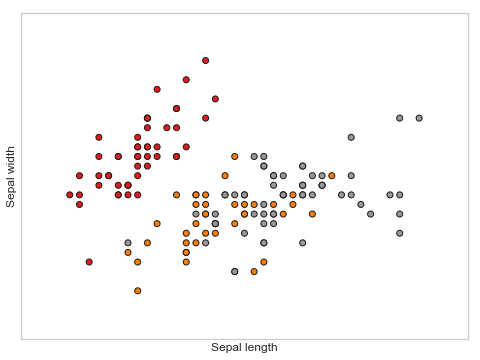

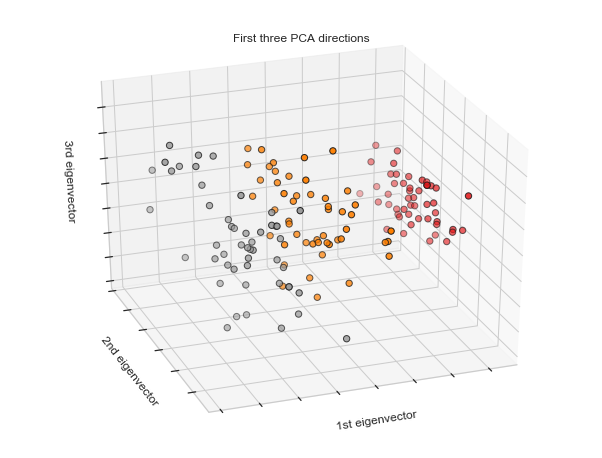

In [474]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [503]:
iris=pd.read_csv('Iris.csv')

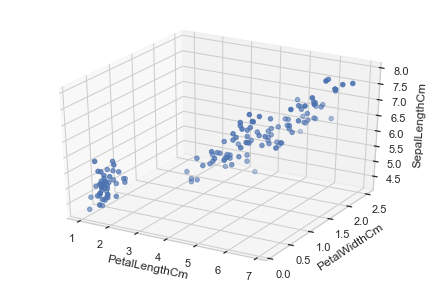

In [507]:
iris=pd.read_csv('Iris.csv')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [iris["PetalWidthCm"], iris["PetalLengthCm"]]
n = 100
ax.scatter(iris["PetalLengthCm"], iris["PetalWidthCm"],iris["SepalLengthCm"])


ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('SepalLengthCm')

plt.tight_layout(pad=0.5)
plt.show()

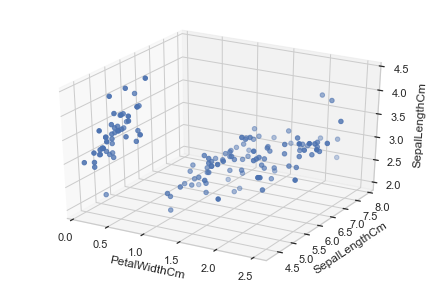

In [511]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [iris["PetalWidthCm"], iris["PetalLengthCm"]]
n = 100
ax.scatter(iris["PetalWidthCm"], iris["SepalLengthCm"],iris["SepalWidthCm"])


ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('SepalLengthCm')
ax.set_zlabel('SepalLengthCm')

plt.tight_layout(pad=0.5)
plt.show()

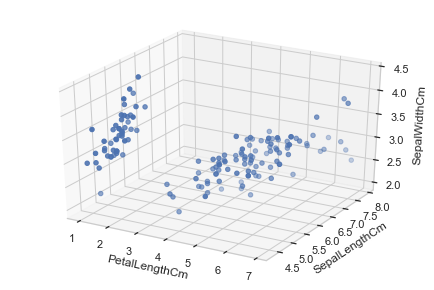

In [512]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [iris["PetalWidthCm"], iris["PetalLengthCm"]]
n = 100
ax.scatter(iris["PetalLengthCm"], iris["SepalLengthCm"],iris["SepalWidthCm"])


ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('SepalLengthCm')
ax.set_zlabel('SepalWidthCm')

plt.tight_layout(pad=0.5)
plt.show()

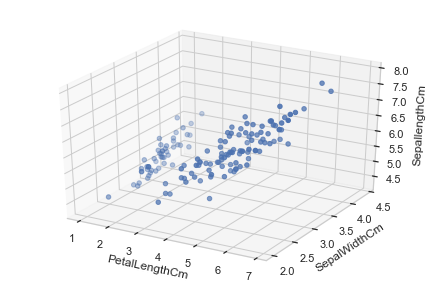

In [513]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [iris["PetalWidthCm"], iris["PetalLengthCm"]]
n = 100
ax.scatter(iris["PetalLengthCm"], iris["SepalWidthCm"],iris["SepalLengthCm"])


ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('SepallengthCm')

plt.tight_layout(pad=0.5)
plt.show()

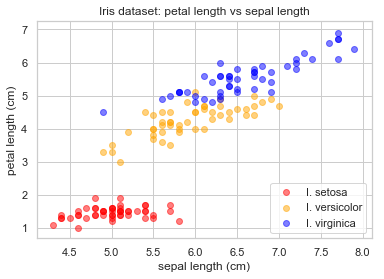

In [514]:
from sklearn import datasets
import pandas as pd

# Load some data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

colours = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')

plt.show()

In [515]:
display(HTML('<h1>Analyzing the ' +
             '<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">' +
             'Pearson correlation coefficient</a></h1>'))

# data without the indexes
dt = iris[iris.columns]

# method : {‘pearson’, ‘kendall’, ‘spearman’}
corr = dt.corr(method="pearson") #returns a dataframe, so it can be reused

# eliminate upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)
# alternate method: http://seaborn.pydata.org/examples/many_pairwise_correlations.html

# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

AttributeError: columns

# H:Feature Selection

In [517]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

iris=pd.read_csv('Iris.csv')
X=iris.drop('Species',axis=1)
y=iris.Species
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


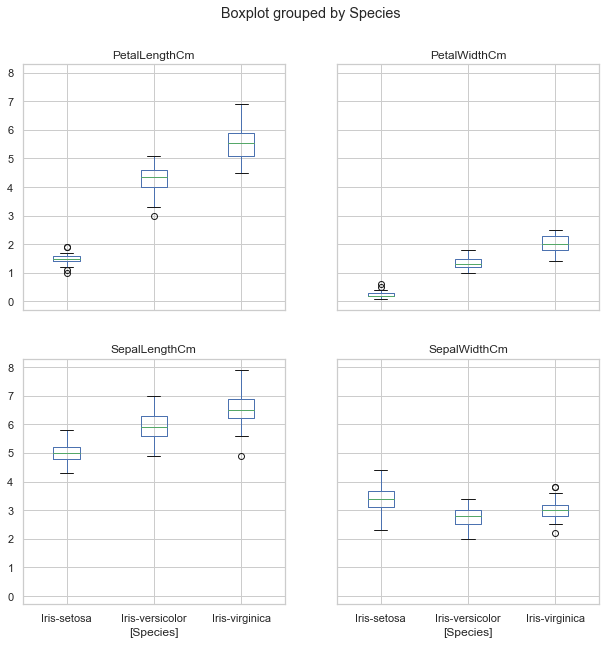

In [518]:
iris=pd.read_csv('Iris.csv')

# To make a Pandas boxplot grouped by species, use .boxplot
#Modify the figsize, by placing a value in the X and Y cordinates
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 10))
plt.show()

In [519]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new

array([[  1. ,   1.4],
       [  2. ,   1.4],
       [  3. ,   1.3],
       [  4. ,   1.5],
       [  5. ,   1.4],
       [  6. ,   1.7],
       [  7. ,   1.4],
       [  8. ,   1.5],
       [  9. ,   1.4],
       [ 10. ,   1.5],
       [ 11. ,   1.5],
       [ 12. ,   1.6],
       [ 13. ,   1.4],
       [ 14. ,   1.1],
       [ 15. ,   1.2],
       [ 16. ,   1.5],
       [ 17. ,   1.3],
       [ 18. ,   1.4],
       [ 19. ,   1.7],
       [ 20. ,   1.5],
       [ 21. ,   1.7],
       [ 22. ,   1.5],
       [ 23. ,   1. ],
       [ 24. ,   1.7],
       [ 25. ,   1.9],
       [ 26. ,   1.6],
       [ 27. ,   1.6],
       [ 28. ,   1.5],
       [ 29. ,   1.4],
       [ 30. ,   1.6],
       [ 31. ,   1.6],
       [ 32. ,   1.5],
       [ 33. ,   1.5],
       [ 34. ,   1.4],
       [ 35. ,   1.5],
       [ 36. ,   1.2],
       [ 37. ,   1.3],
       [ 38. ,   1.5],
       [ 39. ,   1.3],
       [ 40. ,   1.5],
       [ 41. ,   1.3],
       [ 42. ,   1.3],
       [ 43. ,   1.3],
       [ 44

In [520]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new              


array([[1.00e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 1.50e+00, 1.00e-01],
       [1.10e+01, 1.50e+00, 2.00e-01],
       [1.20e+01, 1.60e+00, 2.00e-01],
       [1.30e+01, 1.40e+00, 1.00e-01],
       [1.40e+01, 1.10e+00, 1.00e-01],
       [1.50e+01, 1.20e+00, 2.00e-01],
       [1.60e+01, 1.50e+00, 4.00e-01],
       [1.70e+01, 1.30e+00, 4.00e-01],
       [1.80e+01, 1.40e+00, 3.00e-01],
       [1.90e+01, 1.70e+00, 3.00e-01],
       [2.00e+01, 1.50e+00, 3.00e-01],
       [2.10e+01, 1.70e+00, 2.00e-01],
       [2.20e+01, 1.50e+00, 4.00e-01],
       [2.30e+01, 1.00e+00, 2.00e-01],
       [2.40e+01, 1.70e+00, 5.00e-01],
       [2.50e+01, 1.90e+00, 2.00e-01],
       [2.60e+01, 1.60e+0

 Best Features: PetalWidth + PetalWidth

In [521]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new              


array([[1.00e+00, 2.00e-01],
       [2.00e+00, 2.00e-01],
       [3.00e+00, 2.00e-01],
       [4.00e+00, 2.00e-01],
       [5.00e+00, 2.00e-01],
       [6.00e+00, 4.00e-01],
       [7.00e+00, 3.00e-01],
       [8.00e+00, 2.00e-01],
       [9.00e+00, 2.00e-01],
       [1.00e+01, 1.00e-01],
       [1.10e+01, 2.00e-01],
       [1.20e+01, 2.00e-01],
       [1.30e+01, 1.00e-01],
       [1.40e+01, 1.00e-01],
       [1.50e+01, 2.00e-01],
       [1.60e+01, 4.00e-01],
       [1.70e+01, 4.00e-01],
       [1.80e+01, 3.00e-01],
       [1.90e+01, 3.00e-01],
       [2.00e+01, 3.00e-01],
       [2.10e+01, 2.00e-01],
       [2.20e+01, 4.00e-01],
       [2.30e+01, 2.00e-01],
       [2.40e+01, 5.00e-01],
       [2.50e+01, 2.00e-01],
       [2.60e+01, 2.00e-01],
       [2.70e+01, 4.00e-01],
       [2.80e+01, 2.00e-01],
       [2.90e+01, 2.00e-01],
       [3.00e+01, 2.00e-01],
       [3.10e+01, 2.00e-01],
       [3.20e+01, 4.00e-01],
       [3.30e+01, 1.00e-01],
       [3.40e+01, 2.00e-01],
       [3.50e+

In [522]:
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], value=[0, 1,2])

# Validation Set

In [523]:
# Split-out validation dataset
array = iris.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Test Harness:
We will use 10-fold cross validation to estimate accuracy.
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

We are going to test the following algorithms to know which one is the best to to take care of our data set:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [524]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

ValueError: Unknown label type: 'continuous'

Then we’ll choose the best algorithm: KNN seems to be the best with the value 0.983

In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# Split data + Models

* trainset: 80%
* testset: 20%

In [ ]:
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [ ]:
# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [ ]:
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [ ]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

# Normalized processing

In [ ]:
# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

#iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])